In [12]:
import os
import copy
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import cluster
import pandas as pd
import random

In [2]:
np.random.seed(1)

In [3]:
load_base_dir = '/home/nu/data/contents_shared/NSD-stimuli/derivatives/umap/'
save_base_dir = '/home/nu/data/contents_shared/NSD-stimuli/derivatives/k-means_clustering/'
network = 'pytorch/brain_diffuser_versatile_diffusion'
#network = 'pytorch/transformer_bert'
feat_name ='text_encoder' # 'vision_encoder'
#feat_name = 'vision_encoder'
os.makedirs(save_base_dir, exist_ok=True)

In [4]:
df_NSD_train = pd.read_csv(f'{load_base_dir}/NSD_sub01_hover.csv')
df_NSD_train['Unnamed: 0'] = 'nsd-train'
num_train = len(df_NSD_train)
#train_cluster_labels = cluster_labels[:num_train]

df_NSD_test = pd.read_csv(f'{load_base_dir}/NSD_shared1000_hover.csv')
df_NSD_test['Unnamed: 0'] = 'nsd-test'
#test_cluster_labels = cluster_labels[num_train:]

In [6]:
nsd_umap = np.load(os.path.join(load_base_dir,'cos_sim', network, feat_name ,'nsd_whole_embedding_norm.npy'))


In [7]:
# my visual inspection
cluster_num = 40
kmeans = cluster.KMeans(n_clusters=cluster_num, random_state=0, n_init="auto")

In [8]:
kmeans.fit(nsd_umap)

KMeans(n_clusters=40, n_init='auto', random_state=0)

In [13]:
def choose_colors(num_colors):
  # matplotlib.colors.CSS4_COLORSの値だけをリストにする
  tmp = list(matplotlib.colors.CSS4_COLORS.values())
  random.seed(42)
  # リストにしたものをランダムにシャッフルする
  random.shuffle(tmp)
  # 必要な数だけ先頭から取り出してreturnする
  label2color = tmp[:num_colors]
  return label2color
color_code = choose_colors(40)

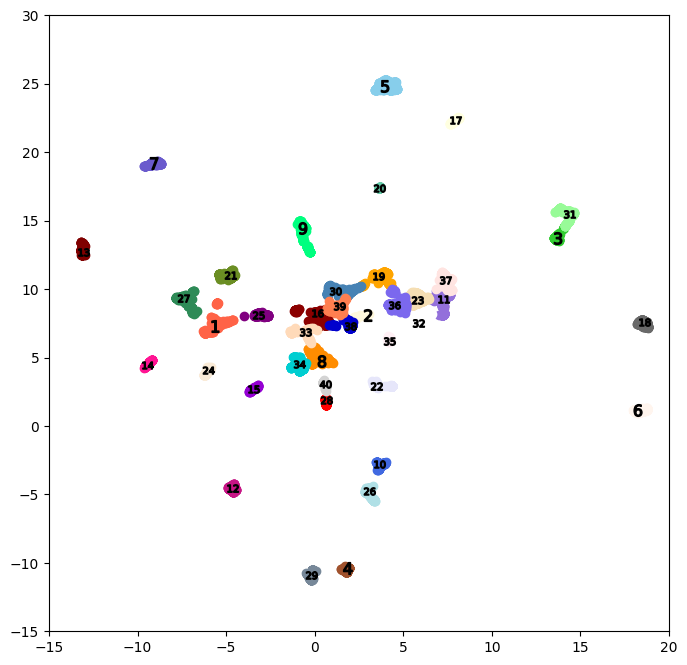

In [20]:
hfont = {'fontname':'Helvetica'}

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
#ax.scatter(nsd_umap[:,0], nsd_umap[:,1], c=kmeans.labels_, cmap = 'tab20' , alpha=0.1)

for i in range(len(np.unique(kmeans.labels_))):
    ax.scatter(nsd_umap[kmeans.labels_==i,0], nsd_umap[kmeans.labels_==i,1], 
              c=color_code[i], label=i) 

for i in range(len(np.unique(kmeans.labels_))):
    x,y =np.median(nsd_umap[kmeans.labels_==i], 0)
    ax.scatter(x,y,  marker= f'${i+1}$', color='black', s=72)
#ax.set_title('k Means clustering (k=40)')
#ax.set_xlim(-10, 25)
#ax.set_ylim(-20, 20)
ax.set_xlim(-15, 20)
ax.set_ylim(-15, 30)
#fig.savefig(os.path.join(save_base_dir, f'{feat_name}_clustering_result_with_number.pdf'))
save_base_dir = './results/assets/figS02'
save_dir = save_base_dir
os.makedirs(save_dir, exist_ok=True)

fig.savefig(os.path.join(save_base_dir, f'{feat_name}_clustering_result_with_number.pdf'))

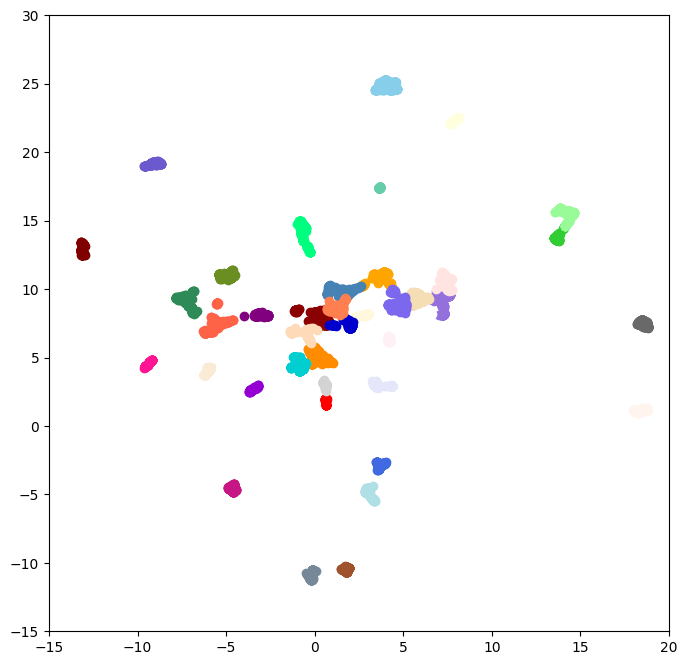

In [19]:
# without mark
hfont = {'fontname':'Helvetica'}

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
#ax.scatter(nsd_umap[:,0], nsd_umap[:,1], c=kmeans.labels_, cmap = 'tab20' , alpha=0.1)

for i in range(len(np.unique(kmeans.labels_))):
    ax.scatter(nsd_umap[kmeans.labels_==i,0], nsd_umap[kmeans.labels_==i,1], 
              c=color_code[i], label=i) 

#for i in range(len(np.unique(kmeans.labels_))):
#    x,y =np.median(nsd_umap[kmeans.labels_==i], 0)
#    ax.scatter(x,y,  marker= f'${i+1}$', color='black', s=72)
#ax.set_title('k Means clustering (k=40)')
#ax.set_xlim(-10, 25)
#ax.set_ylim(-20, 20)
ax.set_xlim(-15, 20)
ax.set_ylim(-15, 30)
#fig.savefig(os.path.join(save_base_dir, f'{feat_name}_clustering_result_with_number.pdf'))

save_base_dir = './results/assets/figS02'
save_dir = save_base_dir
os.makedirs(save_dir, exist_ok=True)

fig.savefig(os.path.join(save_base_dir, f'{feat_name}_clustering_result_with_number_without_number.pdf'))

In [17]:
os.listdir(save_base_dir)

['text_encoder_clustering_result_with_number_without_number.pdf']

In [18]:
!pwd

/home/nu/ken.shirakawa/projects/python_KS/python/share_analysis/spurious_reconstruction
